In [121]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
data = pd.read_excel('experiment_base.xlsx')#, sep='\t')

In [36]:
data.head()

,id,surveytime,Q01,Q02,Q03,Q031,Q032,Q05_1,Q05_2,Q05_3,...,QM3_r11,QM3_r12,QM3_r13,QM3_r14,QM3_r15,QM3_r16,QM3_r17,QM3_r18,QM3_r19,Q04
0,11037,445,0,22.07.1997,3,Бизнес-информатика,3,0,0,1,...,1,2,2,1,1,2,4,3,2,45.0
1,11040,642,0,20.10.1993,5,БИ,3,1,1,1,...,3,1,2,3,4,4,1,5,3,30.0
2,11041,553,0,29.09.1995,5,информационная аналитика в управлении предприя...,3,1,0,1,...,2,2,2,2,4,4,3,2,1,110.0
3,11042,454,0,03.02.1998,2,История,3,1,1,1,...,2,2,5,2,5,4,1,4,1,160.0
4,11045,304,1,24.02.1998,2,"Экономики, менеджмента и бизнес-информатики",3,0,1,1,...,4,2,4,2,5,5,1,4,1,150.0


In [44]:
print (len(data.columns))
print (len(data.index))

84
482


RQ1- Влияет ли выбор ТВ и Радио как основного канала потребления информации на то, насколько студент оценивает необходимость централизированной власти, в отличие от студентов, предпочитающих получать информацию в Интернете. 
Независимая - Q06 
Зависимая - Q14
Контрольная - Q01

RQ2 - Влияет ли показ фотографий, изображающих агрессию (Explicit Terrorist, Threatening Terrorist, Threatening Combatant) на уровень допустимых действий спец служб (среднее и медианное значение принятия ограничений) в отличие от тех респондентов, которым показали фотографии, где все уже позитивно завершилось (Captured Terrorist, Guardian Combatant or Explicit Combatant). 
Независимая - QTreatment
Зависимая - QM3_r_sum / QM3_r_mean
Контрольной переменной нет, так как есть контрольная группа, которая не подтвержена влиянию зависимой переменной

H1 - Выбор телевизора и радио как основного канала напрямую связан с уровнем желаемой централизаци власти
Н2 - Выбор Интернета и других новых медиа как основных каналов напрямую связан с уровнем желаемой централизации власти
Н3 - Остальные виды СМИ не имеют четкой корреляции между типом СМИ и уровнем желаемой централизации власти

Н1 - Фотографии, изображающие агрессию, напрямую влияют на рост допущений в действиях спецслужб
Н0 - Тип показанной фотографии не оказывает никакого влияния на уровень допущений в действиях спецслужб

In [46]:
data["QM3_r19"] = (data["QM3_r19"].values - 6) * (-1)

In [49]:
data.head()

,id,Q01,Q05_1,Q05_2,Q05_3,Q05_4,Q05_5,Q05_6,Q05_7,Q05_8,...,QM3_r11,QM3_r12,QM3_r13,QM3_r14,QM3_r15,QM3_r16,QM3_r17,QM3_r18,QM3_r19,Q04
0,11037,0,0,0,1,0,0,0,1,1,...,1,2,2,1,1,2,4,3,4,45.0
1,11040,0,1,1,1,0,0,1,0,0,...,3,1,2,3,4,4,1,5,3,30.0
2,11041,0,1,0,1,0,0,1,1,1,...,2,2,2,2,4,4,3,2,5,110.0
3,11042,0,1,1,1,0,0,0,1,0,...,2,2,5,2,5,4,1,4,5,160.0
4,11045,1,0,1,1,1,0,0,1,1,...,4,2,4,2,5,5,1,4,5,150.0


Needed data - QTreatment, Q06, Q14, QM3_all

In [54]:
new_data = pd.DataFrame()

for col in ['QTreatment', 'Q06', 'Q14']:
    new_data[col] = data[col]

In [55]:
for i in range(1, 20):
    new_data['QM3_r' + str(i)] = data['QM3_r' + str(i)]

In [56]:
new_data.head()

,QTreatment,Q06,Q14,QM3_r1,QM3_r2,QM3_r3,QM3_r4,QM3_r5,QM3_r6,QM3_r7,...,QM3_r10,QM3_r11,QM3_r12,QM3_r13,QM3_r14,QM3_r15,QM3_r16,QM3_r17,QM3_r18,QM3_r19
0,3,8,3,3,3,4,1,3,2,3,...,2,1,2,2,1,1,2,4,3,4
1,6,6,7,2,1,2,3,1,1,3,...,4,3,1,2,3,4,4,1,5,3
2,7,3,7,4,4,4,4,4,2,4,...,2,2,2,2,2,4,4,3,2,5
3,7,6,4,4,4,4,5,5,2,2,...,5,2,2,5,2,5,4,1,4,5
4,1,4,5,2,2,2,1,4,4,2,...,5,4,2,4,2,5,5,1,4,5


Вводим новый столбец QM3_r_avg, чтобы формализировать понятие допущений в работе спецслужб

In [73]:
x = []
for i in range(1, 20):
    x.append(new_data['QM3_r' + str(i)].values)
    
new_data['QM3_r_avg'] = np.mean(x, axis=0)

In [74]:
new_data.head()

,QTreatment,Q06,Q14,QM3_r1,QM3_r2,QM3_r3,QM3_r4,QM3_r5,QM3_r6,QM3_r7,...,QM3_r11,QM3_r12,QM3_r13,QM3_r14,QM3_r15,QM3_r16,QM3_r17,QM3_r18,QM3_r19,QM3_r_avg
0,3,8,3,3,3,4,1,3,2,3,...,1,2,2,1,1,2,4,3,4,2.578947
1,6,6,7,2,1,2,3,1,1,3,...,3,1,2,3,4,4,1,5,3,2.526316
2,7,3,7,4,4,4,4,4,2,4,...,2,2,2,2,4,4,3,2,5,3.157895
3,7,6,4,4,4,4,5,5,2,2,...,2,2,5,2,5,4,1,4,5,3.736842
4,1,4,5,2,2,2,1,4,4,2,...,4,2,4,2,5,5,1,4,5,3.315789


In [87]:
print ("average:", np.mean(new_data["QTreatment"].values))
print ("median:", np.median(new_data["QTreatment"].values))
print ("percentile 25:", np.percentile(new_data["QTreatment"].values, 25))
print ("percentile 50:", np.percentile(new_data["QTreatment"].values, 50))
print ("percentile 75:", np.percentile(new_data["QTreatment"].values, 75))
print ("mode:", stats.mode(new_data["QTreatment"].values)[0][0])
print ("st_dev:", np.std(new_data["QTreatment"].values))

average: 3.979253112033195
median: 4.0
percentile 25: 2.0
percentile 50: 4.0
percentile 75: 6.0
mode: 3
st_dev: 1.9936582708878487


In [88]:
print ("average:", np.mean(new_data["Q06"].values))
print ("median:", np.median(new_data["Q06"].values))
print ("percentile 25:", np.percentile(new_data["Q06"].values, 25))
print ("percentile 50:", np.percentile(new_data["Q06"].values, 50))
print ("percentile 75:", np.percentile(new_data["Q06"].values, 75))
print ("mode:", stats.mode(new_data["Q06"].values)[0][0])
print ("st_dev:", np.std(new_data["Q06"].values))

average: 4.8029045643153525
median: 6.0
percentile 25: 3.0
percentile 50: 6.0
percentile 75: 6.0
mode: 6
st_dev: 1.8469869674992154


In [89]:
print ("average:", np.mean(new_data["Q14"].values))
print ("median:", np.median(new_data["Q14"].values))
print ("percentile 25:", np.percentile(new_data["Q14"].values, 25))
print ("percentile 50:", np.percentile(new_data["Q14"].values, 50))
print ("percentile 75:", np.percentile(new_data["Q14"].values, 75))
print ("mode:", stats.mode(new_data["Q14"].values)[0][0])
print ("st_dev:", np.std(new_data["Q14"].values))

average: 4.9896265560165975
median: 5.0
percentile 25: 4.0
percentile 50: 5.0
percentile 75: 6.0
mode: 5
st_dev: 1.5030730159393408


In [90]:
print ("average:", np.mean(new_data["QM3_r_avg"].values))
print ("median:", np.median(new_data["QM3_r_avg"].values))
print ("percentile 25:", np.percentile(new_data["QM3_r_avg"].values, 25))
print ("percentile 50:", np.percentile(new_data["QM3_r_avg"].values, 50))
print ("percentile 75:", np.percentile(new_data["QM3_r_avg"].values, 75))
print ("mode:", stats.mode(new_data["QM3_r_avg"].values)[0][0])
print ("st_dev:", np.std(new_data["QM3_r_avg"].values))

average: 2.8863288927713477
median: 2.9473684210526314
percentile 25: 2.4210526315789473
percentile 50: 2.9473684210526314
percentile 75: 3.3684210526315788
mode: 2.9473684210526314
st_dev: 0.6616499039927696


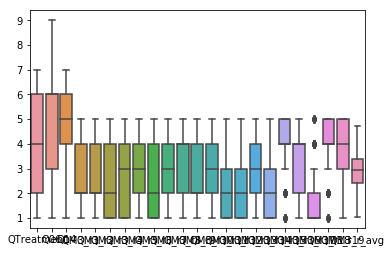

In [95]:
ax = sns.boxplot(data=new_data)

(array([69., 66., 76., 70., 68., 62., 71.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

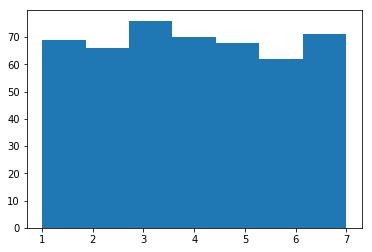

In [98]:
plt.hist(new_data.QTreatment, 7)

(array([ 32.,   2., 145.,  19.,   1., 241.,  24.,  13.,   5.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <a list of 9 Patch objects>)

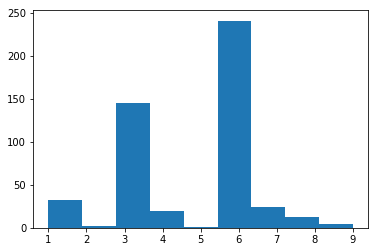

In [104]:
plt.hist(new_data.Q06, 9)

(array([  9.,  23.,  49.,  85., 120., 109.,  87.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

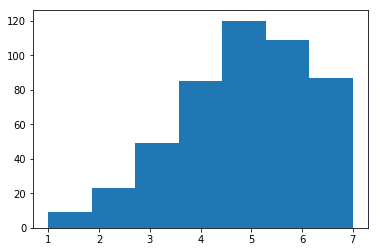

In [106]:
plt.hist(new_data.Q14, 7)

(array([ 23., 118., 184., 140.,  17.]),
 array([1.05263158, 1.78947368, 2.52631579, 3.26315789, 4.        ,
        4.73684211]),
 <a list of 5 Patch objects>)

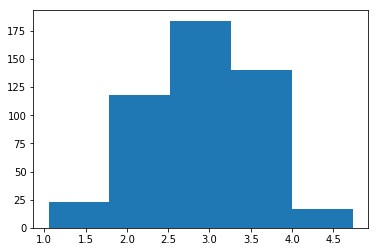

In [108]:
plt.hist(new_data.QM3_r_avg, 5)

Коэффициент связи Пирсона в переменных

In [112]:
np.corrcoef(new_data.Q06.values, new_data.Q14.values)[0, 1]

0.0777325712513059

In [113]:
np.corrcoef(new_data.QTreatment.values, new_data.QM3_r_avg.values)[0, 1]

-0.04301178336192069

Вообще все корреляции между переменными

In [115]:
new_data.corr()

,QTreatment,Q06,Q14,QM3_r1,QM3_r2,QM3_r3,QM3_r4,QM3_r5,QM3_r6,QM3_r7,...,QM3_r11,QM3_r12,QM3_r13,QM3_r14,QM3_r15,QM3_r16,QM3_r17,QM3_r18,QM3_r19,QM3_r_avg
QTreatment,1.000000,0.027624,0.035930,-0.046451,-0.036358,0.011457,0.032470,-0.054108,-0.053001,-0.038223,...,-0.080019,0.025407,-0.014260,-0.034621,-0.007974,-0.023601,-0.058806,-0.059706,-0.039744,-0.043012
Q06,0.027624,1.000000,0.077733,-0.131712,-0.106596,-0.145171,-0.053623,-0.125181,-0.175126,-0.203603,...,-0.104211,-0.140029,-0.128622,-0.095919,-0.059137,-0.071779,-0.084419,-0.098219,-0.093908,-0.209190
Q14,0.035930,0.077733,1.000000,-0.271212,-0.240872,-0.204809,-0.238137,-0.204884,-0.218300,-0.421327,...,-0.162640,-0.194276,-0.175688,-0.220410,-0.064298,-0.074450,-0.217059,-0.137537,-0.207725,-0.352646
QM3_r1,-0.046451,-0.131712,-0.271212,1.000000,0.738670,0.417778,0.250124,0.259454,0.247665,0.330320,...,0.178121,0.257284,0.280067,0.157684,0.218445,0.128836,0.290951,0.199099,0.299571,0.560501
QM3_r2,-0.036358,-0.106596,-0.240872,0.738670,1.000000,0.452600,0.248245,0.324690,0.328614,0.328501,...,0.198084,0.280339,0.300899,0.208248,0.159062,0.165244,0.260146,0.197181,0.287758,0.582533
QM3_r3,0.011457,-0.145171,-0.204809,0.417778,0.452600,1.000000,0.371567,0.420503,0.273464,0.329573,...,0.147599,0.236527,0.302060,0.151049,0.145596,0.096120,0.268663,0.172648,0.244649,0.529130
QM3_r4,0.032470,-0.053623,-0.238137,0.250124,0.248245,0.371567,1.000000,0.509513,0.255564,0.372981,...,0.136931,0.279339,0.347602,0.177817,0.301902,0.228267,0.271354,0.204448,0.320548,0.568545
QM3_r5,-0.054108,-0.125181,-0.204884,0.259454,0.324690,0.420503,0.509513,1.000000,0.277118,0.392768,...,0.123359,0.289221,0.360602,0.249021,0.210300,0.272380,0.222274,0.274869,0.369426,0.592648
QM3_r6,-0.053001,-0.175126,-0.218300,0.247665,0.328614,0.273464,0.255564,0.277118,1.000000,0.412667,...,0.243331,0.546898,0.324816,0.276799,0.208107,0.147230,0.281755,0.239580,0.260753,0.582212
QM3_r7,-0.038223,-0.203603,-0.421327,0.330320,0.328501,0.329573,0.372981,0.392768,0.412667,1.000000,...,0.214669,0.409508,0.339805,0.373573,0.200721,0.250100,0.319511,0.332680,0.387467,0.648253


In [131]:
data.columns

Index(['Q01', 'Q05_1', 'Q05_2', 'Q05_3', 'Q05_4', 'Q05_5', 'Q05_6', 'Q05_7',
       'Q05_8', 'Q05_9', 'Q06', 'Q06o9', 'Q07_1', 'Q07_2', 'Q07_3', 'Q07_4',
       'Q07_5', 'Q07_6', 'Q07_7', 'Q07_8', 'Q07_9', 'Q07_10', 'Q07o9', 'Q08_1',
       'Q08_2', 'Q08_3', 'Q08_4', 'Q08_5', 'Q08_6', 'Q08_7', 'Q08_8', 'Q08_9',
       'Q08_10', 'Q08o9', 'Q09_1', 'Q09_2', 'Q09_3', 'Q09_4', 'Q09_5', 'Q09o4',
       'QM10_r1', 'QM10_r2', 'QM10_r3', 'QM10_r4', 'QM10_r5', 'QM10_r6',
       'QM10_r7', 'QM10_r8', 'QM10_r9', 'Q10_r9_o', 'Q11', 'Q12', 'Q13',
       'Q13o7', 'Q14', 'Q15', 'QTreatment', 'QM3_r1', 'QM3_r2', 'QM3_r3',
       'QM3_r4', 'QM3_r5', 'QM3_r6', 'QM3_r7', 'QM3_r8', 'QM3_r9', 'QM3_r10',
       'QM3_r11', 'QM3_r12', 'QM3_r13', 'QM3_r14', 'QM3_r15', 'QM3_r16',
       'QM3_r17', 'QM3_r18', 'QM3_r19', 'Q04'],
      dtype='object')

In [134]:
test_data = data[['Q01', 'Q05_1', 'Q05_2', 'Q05_3', 'Q05_4', 'Q05_5', 'Q05_6', 'Q05_7','Q05_8', 'Q05_9', 'Q06', 'Q07_1', 'Q07_2', 'Q07_3', 'Q07_4','Q07_5', 'Q07_6', 'Q07_7', 'Q07_8', 'Q07_9', 'Q07_10', 'Q08_1', 'Q08_2', 'Q08_3', 'Q08_4', 'Q08_5', 'Q08_6', 'Q08_7', 'Q08_8', 'Q08_9','Q08_10', 'Q09_1', 'Q09_2', 'Q09_3', 'Q09_4', 'Q09_5', 'QM10_r1', 'QM10_r2', 'QM10_r3', 'QM10_r4', 'QM10_r5', 'QM10_r6',
       'QM10_r7', 'QM10_r8', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']]

In [149]:
test_data.replace(' ', 0.0, inplace=True)

/home/alexey/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [151]:
test_data = test_data.astype('float')

In [152]:
xtrain, xtest, ytrain, ytest = train_test_split(test_data, new_data.QM3_r_avg, test_size=0.2)

In [153]:
model = LinearRegression()

In [154]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Точность модели:

In [155]:
mean_absolute_error(model.predict(xtest), ytest)

0.414576100305804

Коэффициенты линейной модели для каждой переменной

In [156]:
model.coef_

array([-1.15131200e-01, -4.27249610e-02, -9.91822294e-02,  6.66740517e-02,
       -8.38364615e-02,  2.41971250e-01, -1.82344524e-02, -8.58157155e-02,
       -4.14236662e-02,  9.31355048e-02, -1.10555409e-02, -5.63308443e-02,
       -7.59850624e-02,  9.27607698e-02,  1.11470103e-01,  8.18273756e-02,
       -1.10868192e-01, -2.70095192e-01,  4.32953086e-02, -2.12069574e-01,
       -2.10231862e-01, -1.94032092e-01, -9.69479281e-02,  1.48877270e-02,
       -2.44960198e-02, -6.49249749e-02,  6.66472475e-02,  8.80758924e-02,
        9.69514753e-02,  4.49746324e-02, -1.55858993e-01, -7.86762648e-02,
       -3.06292042e-02,  1.77678960e-01, -4.61176413e-02,  9.18341824e-03,
        7.74875071e-02, -2.30437241e-02,  1.14414878e-04, -7.38429233e-03,
        1.00208450e-02, -1.08972833e-02,  6.44083204e-02,  2.45482918e-03,
        4.83870222e-02, -6.93375713e-02, -5.43552179e-02, -6.70403481e-02,
        1.84531998e-02])

## RQ1

if Q06 = 1 or Q06 = 6 => Q14 = range(1, 3)

In [71]:
new_data[new_data.Q06.isin([1, 6])][new_data.Q14.isin([1,2,3])].shape[0] / new_data[new_data.Q06.isin([1, 6])].shape[0]

/home/alexey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.1684981684981685

Следовательно RQ1 скорее не подтвердился, так как корреляция минимальна

## RQ2

if QTreatment = 3, 4 or 6 => QM3_r_avg = range(1, 3)

In [157]:
new_data[new_data.QTreatment.isin([3, 4, 6])][new_data.QM3_r_avg.isin([1,2,3])].shape[0] / new_data[new_data.QTreatment.isin([3, 4, 6])].shape[0]

/home/alexey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.04807692307692308

Следовательно RQ2 не подтвердился, так как корреляция минимальна